In [59]:
'''
Using one of the three datasets to demonstrate k-means clustering using the scikit learn package (50 points).
Be sure to review the readings before you start on this assignment. 
Calculate the sum of least square error for each different values of 'k'. 
Using Matplotlib determine the optimal number of clusters (k) using the elbow method along with a brief explanation (50 points).
Finally plot the optimal clusters with their centroids along with a brief explanation (50 points). 
Comment your code as needed.

a.    https://archive.ics.uci.edu/ml/datasets/Breast+CancerLinks to an external site.
b.    https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008Links to an external site.
c.    https://archive.ics.uci.edu/ml/datasets/Arrhythmia

Total points: 150
'''

"\nUsing one of the three datasets to demonstrate k-means clustering using the scikit learn package (50 points).\nBe sure to review the readings before you start on this assignment. \nCalculate the sum of least square error for each different values of 'k'. \nUsing Matplotlib determine the optimal number of clusters (k) using the elbow method along with a brief explanation (50 points).\nFinally plot the optimal clusters with their centroids along with a brief explanation (50 points). \nComment your code as needed.\n\na.    https://archive.ics.uci.edu/ml/datasets/Breast+CancerLinks to an external site.\nb.    https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008Links to an external site.\nc.    https://archive.ics.uci.edu/ml/datasets/Arrhythmia\n\nTotal points: 150\n"

Original shape: (277, 9)
Encoded shape: (277, 31)


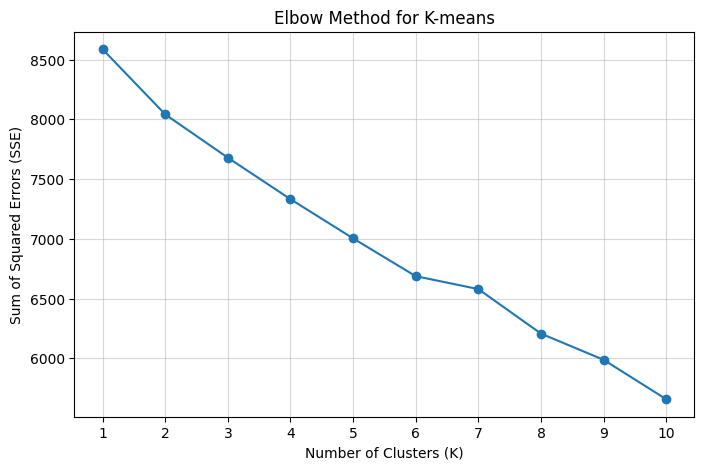

k=1: SSE=8587.000
k=2: SSE=8041.561
k=3: SSE=7679.282
k=4: SSE=7332.018
k=5: SSE=7003.809
k=6: SSE=6687.519
k=7: SSE=6579.330
k=8: SSE=6206.815
k=9: SSE=5987.498
k=10: SSE=5657.595

Centroids shape: (3, 31)
Chosen k: 3
Explanation of optimal number of clusters: The plotted elbow curve showed the deepest drop in SSE between K=1 and K=3. The curve bends at K=3, indicating that this is the "elbow point" where the decrease in WCSS (Within-Cluster Sum of Squares) or how close data points are to its corresponding cluster becomes less significant. Meaning that adding more clusters than 3 does not significantly improve the fit.


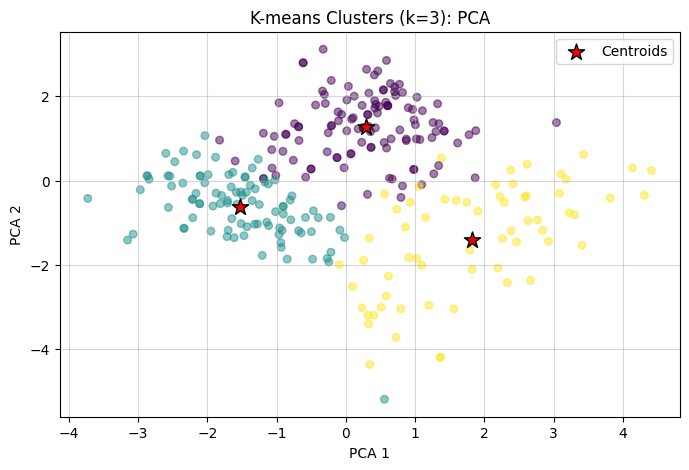

Centroids explanation: The cluster/scatter plot shows the data seperated into 3 clusters (the optimal number of clusters as determined by the elbow method). The red star represents the centroids and each point is the color of its corresponding cluster. The scatter plot is a visual of K-Means groups with similar data points clustered together and at the center of each cluster is the centroid, which is the average position of all the points in the cluster.


In [74]:
#import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from ucimlrepo import fetch_ucirepo

#load dataset
breast_cancer = fetch_ucirepo(id=14)
X = breast_cancer.data.features
y = breast_cancer.data.targets  #not used for clusterin

#import 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#clean data
#.dropna() drops rows with missing values
X_CleanData = X.dropna().copy()

#convert categorical columns to numeric columns
#.get_dummies()/one-hot encoding creates new columns for each 
#category in a categorical variable (column contains either 0/1 indicating it belongs to the category)
X_NumColumns = pd.get_dummies(X_CleanData, drop_first=True)

print("Original shape:", X_CleanData.shape)
print("Encoded shape:", X_NumColumns.shape)

#scale features
scaler = StandardScaler()
X_scaled_df = scaler.fit_transform(X_NumColumns)

#calculate SSE for different k values
k_values = list(range(1, 11)) #run k_values 1-10
SSE = [] #empty list that will be used to store sum of squared errors

for k in k_values:
    km = KMeans(n_clusters=k, random_state=42, n_init=10) #random_state=42 makes results reproducible (arbitrary choice in coding)
    km.fit(X_scaled_df)
    SSE.append(km.inertia_)

#plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, SSE, marker='o')
plt.xticks(k_values)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for K-means')
plt.grid(True, alpha=0.5)
plt.show()

#print SSE values
for k, val in zip(k_values, SSE):
    print(f"k={k}: SSE={val:.3f}")

#pick optimal k based on elbow plot
print()
k_opt = 3  

km_opt = KMeans(n_clusters=k_opt, random_state=42, n_init=10)
km_opt.fit(X_scaled)

labels = km_opt.labels_
centroids = km_opt.cluster_centers_

print("Centroids shape:", centroids.shape)
print(f"Chosen k: {k_opt}")
print("""Explanation of optimal number of clusters: The plotted elbow curve showed the deepest drop in SSE between K=1 and K=3. The curve bends at K=3, indicating that this is the "elbow point" where the decrease in WCSS (Within-Cluster Sum of Squares) or how close data points are to its corresponding cluster becomes less significant. Meaning that adding more clusters than 3 does not significantly improve the fit.""")
#Explanation of optimal number of clusters: The plotted elbow curve showed the deepest drop in SSE between K=1 and K=3. 
#The curve bends at K=3, indicating that this is the "elbow point" where the decrease in WCSS (Within-Cluster Sum of Squares) 
#or how close data points are to its corresponding cluster becomes less significant. Meaning that adding more clusters than
#3 does not significantly improve the fit.""")

#visualize clusters 
#import 
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)
centroids_pca = pca.transform(centroids)

plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=30, alpha=0.5)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
            c='red', s=150, marker='*', edgecolor='black', label='Centroids')
plt.xlabel('PCA 1') #largest amt of variance 
plt.ylabel('PCA 2') #2nd-largest amt of variance 
plt.title(f'K-means Clusters (k={k_opt}): PCA')
plt.legend()
plt.grid(True, alpha=0.5)
plt.show()

print("""Centroids explanation: The cluster/scatter plot shows the data seperated into 3 clusters (the optimal number of clusters as determined by the elbow method). The red star represents the centroids and each point is the color of its corresponding cluster. The scatter plot is a visual of K-Means groups with similar data points clustered together and at the center of each cluster is the centroid, which is the average position of all the points in the cluster.""")
